In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("beatafaron/fmcg-daily-sales-data-to-2022-2024")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fmcg-daily-sales-data-to-2022-2024' dataset.
Path to dataset files: /kaggle/input/fmcg-daily-sales-data-to-2022-2024


In [2]:
import os
import pandas as pd

fmcg = pd.read_csv(os.path.join(path, 'FMCG_2022_2024.csv'))
fmcg.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


In [ ]:
d = fmcg.groupby(
    by = ['brand','segment','category','date'],
    as_index=False
).agg(
    avg_prc = ('units_sold', lambda x: (x * fmcg.loc[x.index,'price_unit']).sum() / x.sum() if x.sum() != 0 else fmcg.loc[x.index,'price_unit'].mean()),
    promotion = ('promotion_flag','max'),
    delivery_days = ('delivery_days','mean'),
    stock_available = ('stock_available','sum'),
    delivery_qty = ('delivered_qty','sum'),
    units_sold = ('units_sold','sum')
).sort_values(
    by = ['brand','segment','category','date'],
    ignore_index=True
)
d.head()

,brand,segment,category,date,avg_prc,promotion,delivery_days,stock_available,delivery_qty,units_sold
0,JuBrand3,Juice-Seg3,Juice,2022-07-11,5.811121,1,3.428571,1184,1320,223
1,JuBrand3,Juice-Seg3,Juice,2022-07-12,5.867237,0,3.777778,1223,1418,152
2,JuBrand3,Juice-Seg3,Juice,2022-07-13,5.807762,0,2.375000,1261,1516,143
3,JuBrand3,Juice-Seg3,Juice,2022-07-14,5.779880,1,4.000000,1211,1287,166
4,JuBrand3,Juice-Seg3,Juice,2022-07-15,5.227967,0,2.888889,1573,1678,182


In [ ]:
d['date'] = pd.to_datetime(d['date'], format='%Y-%m-%d')
d.describe()

,date,avg_prc,promotion,delivery_days,stock_available,delivery_qty,units_sold
count,21536,21536.000000,21536.000000,21536.000000,21536.000000,21536.000000,21536.000000
mean,2023-10-16 07:23:26.835066880,5.251888,0.737741,3.002655,1396.820719,1588.463503,176.440565
min,2022-01-21 00:00:00,2.159157,0.000000,1.200000,279.000000,373.000000,26.000000
25%,2023-03-26 00:00:00,4.679536,0.000000,2.666667,1084.000000,1253.750000,119.000000
50%,2023-10-28 00:00:00,5.252742,1.000000,3.000000,1255.000000,1427.000000,154.000000
75%,2024-05-30 00:00:00,5.818230,1.000000,3.333333,1449.250000,1613.000000,205.000000
max,2024-12-31 00:00:00,8.400948,1.000000,4.714286,4683.000000,5033.000000,886.000000
std,NaN,0.843027,0.439873,0.495677,574.033349,640.289527,89.457788


In [ ]:
import holidays

d['year'] = d['date'].dt.year
d['month'] = d['date'].dt.month
d['day'] = d['date'].dt.day
d['weekday'] = d['date'].dt.day_of_week
d['week'] = d['date'].dt.isocalendar().week

# Create a holidays object for the relevant years in your DataFrame
min_year = d['date'].min().year
max_year = d['date'].max().year
us_holidays = holidays.US(years=range(min_year, max_year + 1))

d['is_holiday'] = d['date'].apply(lambda x: x in us_holidays).astype(int)
d['is_weekend'] = (d['weekday'] >= 5).astype(int)

d.head()

,brand,segment,category,date,avg_prc,promotion,delivery_days,stock_available,delivery_qty,units_sold,year,month,day,weekday,week,is_holiday,is_weekend
0,JuBrand3,Juice-Seg3,Juice,2022-07-11,5.811121,1,3.428571,1184,1320,223,2022,7,11,0,28,0,0
1,JuBrand3,Juice-Seg3,Juice,2022-07-12,5.867237,0,3.777778,1223,1418,152,2022,7,12,1,28,0,0
2,JuBrand3,Juice-Seg3,Juice,2022-07-13,5.807762,0,2.375000,1261,1516,143,2022,7,13,2,28,0,0
3,JuBrand3,Juice-Seg3,Juice,2022-07-14,5.779880,1,4.000000,1211,1287,166,2022,7,14,3,28,0,0
4,JuBrand3,Juice-Seg3,Juice,2022-07-15,5.227967,0,2.888889,1573,1678,182,2022,7,15,4,28,0,0


In [ ]:
for i in range(1,8):
    d[f'day_minus_{i}'] = d.groupby(
        by = ['brand','segment','category']
    )['units_sold'].shift(i)

for i in [7,30]:
    d[f'day_rolling_{i}_avg'] = d.groupby(
        by = ['brand','segment','category']
    )['units_sold'].shift(1).rolling(window=i).mean()
    d[f'day_rolling_{i}_std'] = d.groupby(
        by = ['brand','segment','category']
    )['units_sold'].shift(1).rolling(window=i).std()

d['momentum1'] = d['day_minus_1'] / d['day_minus_2']
d.head()

,brand,segment,category,date,avg_prc,promotion,delivery_days,stock_available,delivery_qty,units_sold,...,day_minus_3,day_minus_4,day_minus_5,day_minus_6,day_minus_7,day_rolling_7_avg,day_rolling_7_std,day_rolling_30_avg,day_rolling_30_std,momentum1
0,JuBrand3,Juice-Seg3,Juice,2022-07-11,5.811121,1,3.428571,1184,1320,223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JuBrand3,Juice-Seg3,Juice,2022-07-12,5.867237,0,3.777778,1223,1418,152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JuBrand3,Juice-Seg3,Juice,2022-07-13,5.807762,0,2.375000,1261,1516,143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681614
3,JuBrand3,Juice-Seg3,Juice,2022-07-14,5.779880,1,4.000000,1211,1287,166,...,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.940789
4,JuBrand3,Juice-Seg3,Juice,2022-07-15,5.227967,0,2.888889,1573,1678,182,...,152.0,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.160839


TEST THỬ

In [ ]:
# filter rows matching the first row on these columns
cols = ['brand', 'segment', 'category']
first_vals = d.loc[0, cols]
mask = (d[cols] == first_vals).all(axis=1)
filtered_d = d[mask].copy()

print("Number of matching rows:", filtered_d.shape[0])
filtered_d.head()

Number of matching rows: 905


,brand,segment,category,date,avg_prc,promotion,delivery_days,stock_available,delivery_qty,units_sold,...,day_minus_3,day_minus_4,day_minus_5,day_minus_6,day_minus_7,day_rolling_7_avg,day_rolling_7_std,day_rolling_30_avg,day_rolling_30_std,momentum1
0,JuBrand3,Juice-Seg3,Juice,2022-07-11,5.811121,1,3.428571,1184,1320,223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JuBrand3,Juice-Seg3,Juice,2022-07-12,5.867237,0,3.777778,1223,1418,152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JuBrand3,Juice-Seg3,Juice,2022-07-13,5.807762,0,2.375000,1261,1516,143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681614
3,JuBrand3,Juice-Seg3,Juice,2022-07-14,5.779880,1,4.000000,1211,1287,166,...,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.940789
4,JuBrand3,Juice-Seg3,Juice,2022-07-15,5.227967,0,2.888889,1573,1678,182,...,152.0,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.160839


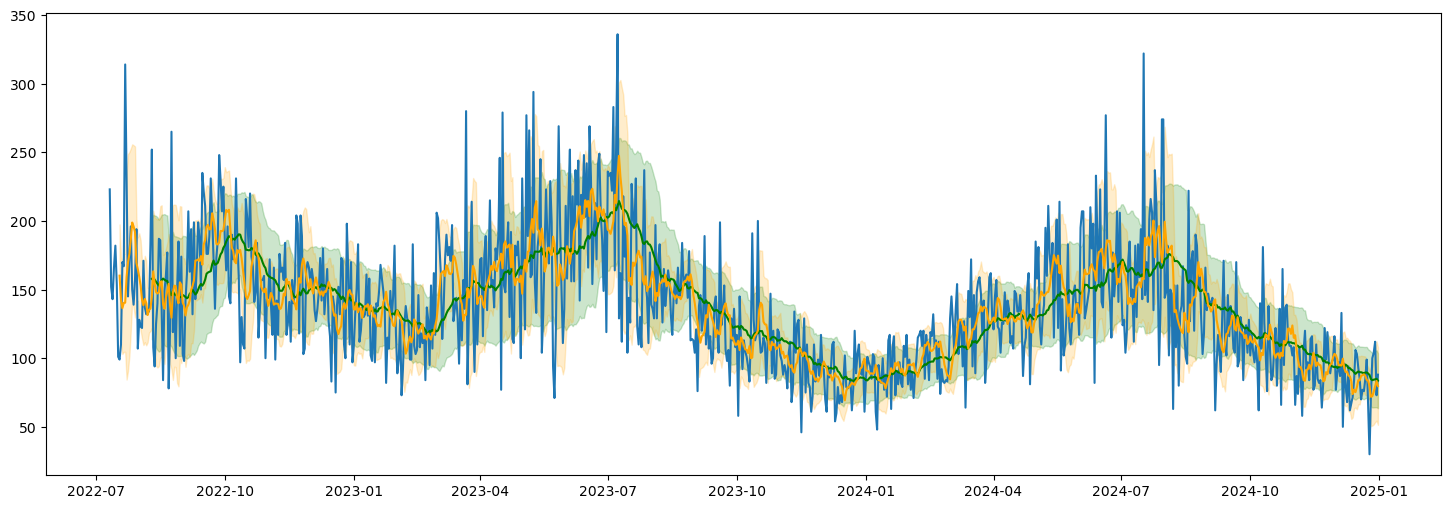

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
plt.plot(filtered_d['date'],filtered_d['units_sold'])
plt.plot(filtered_d['date'],filtered_d['day_rolling_30_avg'], color = 'green')
plt.fill_between(
    filtered_d['date'],
    filtered_d['day_rolling_30_avg']-filtered_d['day_rolling_30_std'],
    filtered_d['day_rolling_30_avg']+filtered_d['day_rolling_30_std'],
    alpha=0.2,
    color='green')

plt.plot(filtered_d['date'],filtered_d['day_rolling_7_avg'], color = 'orange')
plt.fill_between(
    filtered_d['date'],
    filtered_d['day_rolling_7_avg']-filtered_d['day_rolling_7_std'],
    filtered_d['day_rolling_7_avg']+filtered_d['day_rolling_7_std'],
    alpha=0.2,
    color='orange')



In [ ]:
d.dropna(inplace = True)
d

,brand,segment,category,date,avg_prc,promotion,delivery_days,stock_available,delivery_qty,units_sold,...,day_minus_3,day_minus_4,day_minus_5,day_minus_6,day_minus_7,day_rolling_7_avg,day_rolling_7_std,day_rolling_30_avg,day_rolling_30_std,momentum1
30,JuBrand3,Juice-Seg3,Juice,2022-08-10,4.888611,1,3.555556,1657,1700,252,...,134.0,132.0,137.0,171.0,122.0,144.714286,22.816034,157.766667,43.998968,1.365672
31,JuBrand3,Juice-Seg3,Juice,2022-08-11,5.115648,1,3.000000,857,1001,108,...,134.0,134.0,132.0,137.0,171.0,163.285714,44.165274,158.733333,45.764716,1.377049
32,JuBrand3,Juice-Seg3,Juice,2022-08-12,5.402128,1,3.285714,1075,1383,94,...,183.0,134.0,134.0,132.0,137.0,154.285714,48.534229,157.266667,46.683774,0.428571
33,JuBrand3,Juice-Seg3,Juice,2022-08-13,4.961200,1,2.571429,1031,1172,125,...,252.0,183.0,134.0,134.0,132.0,148.142857,53.548821,155.633333,48.037689,0.870370
34,JuBrand3,Juice-Seg3,Juice,2022-08-14,7.488286,1,3.000000,1120,1477,140,...,108.0,252.0,183.0,134.0,134.0,147.142857,53.964274,154.266667,48.315010,1.329787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21531,YoBrand4,Yogurt-Seg3,Yogurt,2024-12-27,4.126292,0,4.000000,1387,1587,89,...,143.0,80.0,116.0,67.0,137.0,107.714286,27.711095,97.433333,22.038655,0.990566
21532,YoBrand4,Yogurt-Seg3,Yogurt,2024-12-28,5.185410,0,3.333333,926,1052,61,...,106.0,143.0,80.0,116.0,67.0,100.857143,25.069427,96.700000,21.937450,0.847619
21533,YoBrand4,Yogurt-Seg3,Yogurt,2024-12-29,5.890682,0,4.285714,1307,1394,88,...,105.0,106.0,143.0,80.0,116.0,100.000000,26.482699,94.800000,22.490458,0.685393
21534,YoBrand4,Yogurt-Seg3,Yogurt,2024-12-30,4.770000,1,1.666667,890,982,71,...,89.0,105.0,106.0,143.0,80.0,96.000000,25.768197,94.766667,22.500089,1.442623


KIỂM TRA CORRELATION

In [ ]:
# One-hot encode the categorical columns listed in `cols`
d1 = pd.get_dummies(d, columns=cols)

d1.head()

,date,avg_prc,promotion,delivery_days,stock_available,delivery_qty,units_sold,year,month,day,...,segment_SnackBar-Seg2,segment_SnackBar-Seg3,segment_Yogurt-Seg1,segment_Yogurt-Seg2,segment_Yogurt-Seg3,category_Juice,category_Milk,category_ReadyMeal,category_SnackBar,category_Yogurt
30,2022-08-10,4.888611,1,3.555556,1657,1700,252,2022,8,10,...,False,False,False,False,False,True,False,False,False,False
31,2022-08-11,5.115648,1,3.000000,857,1001,108,2022,8,11,...,False,False,False,False,False,True,False,False,False,False
32,2022-08-12,5.402128,1,3.285714,1075,1383,94,2022,8,12,...,False,False,False,False,False,True,False,False,False,False
33,2022-08-13,4.961200,1,2.571429,1031,1172,125,2022,8,13,...,False,False,False,False,False,True,False,False,False,False
34,2022-08-14,7.488286,1,3.000000,1120,1477,140,2022,8,14,...,False,False,False,False,False,True,False,False,False,False


<Axes: >

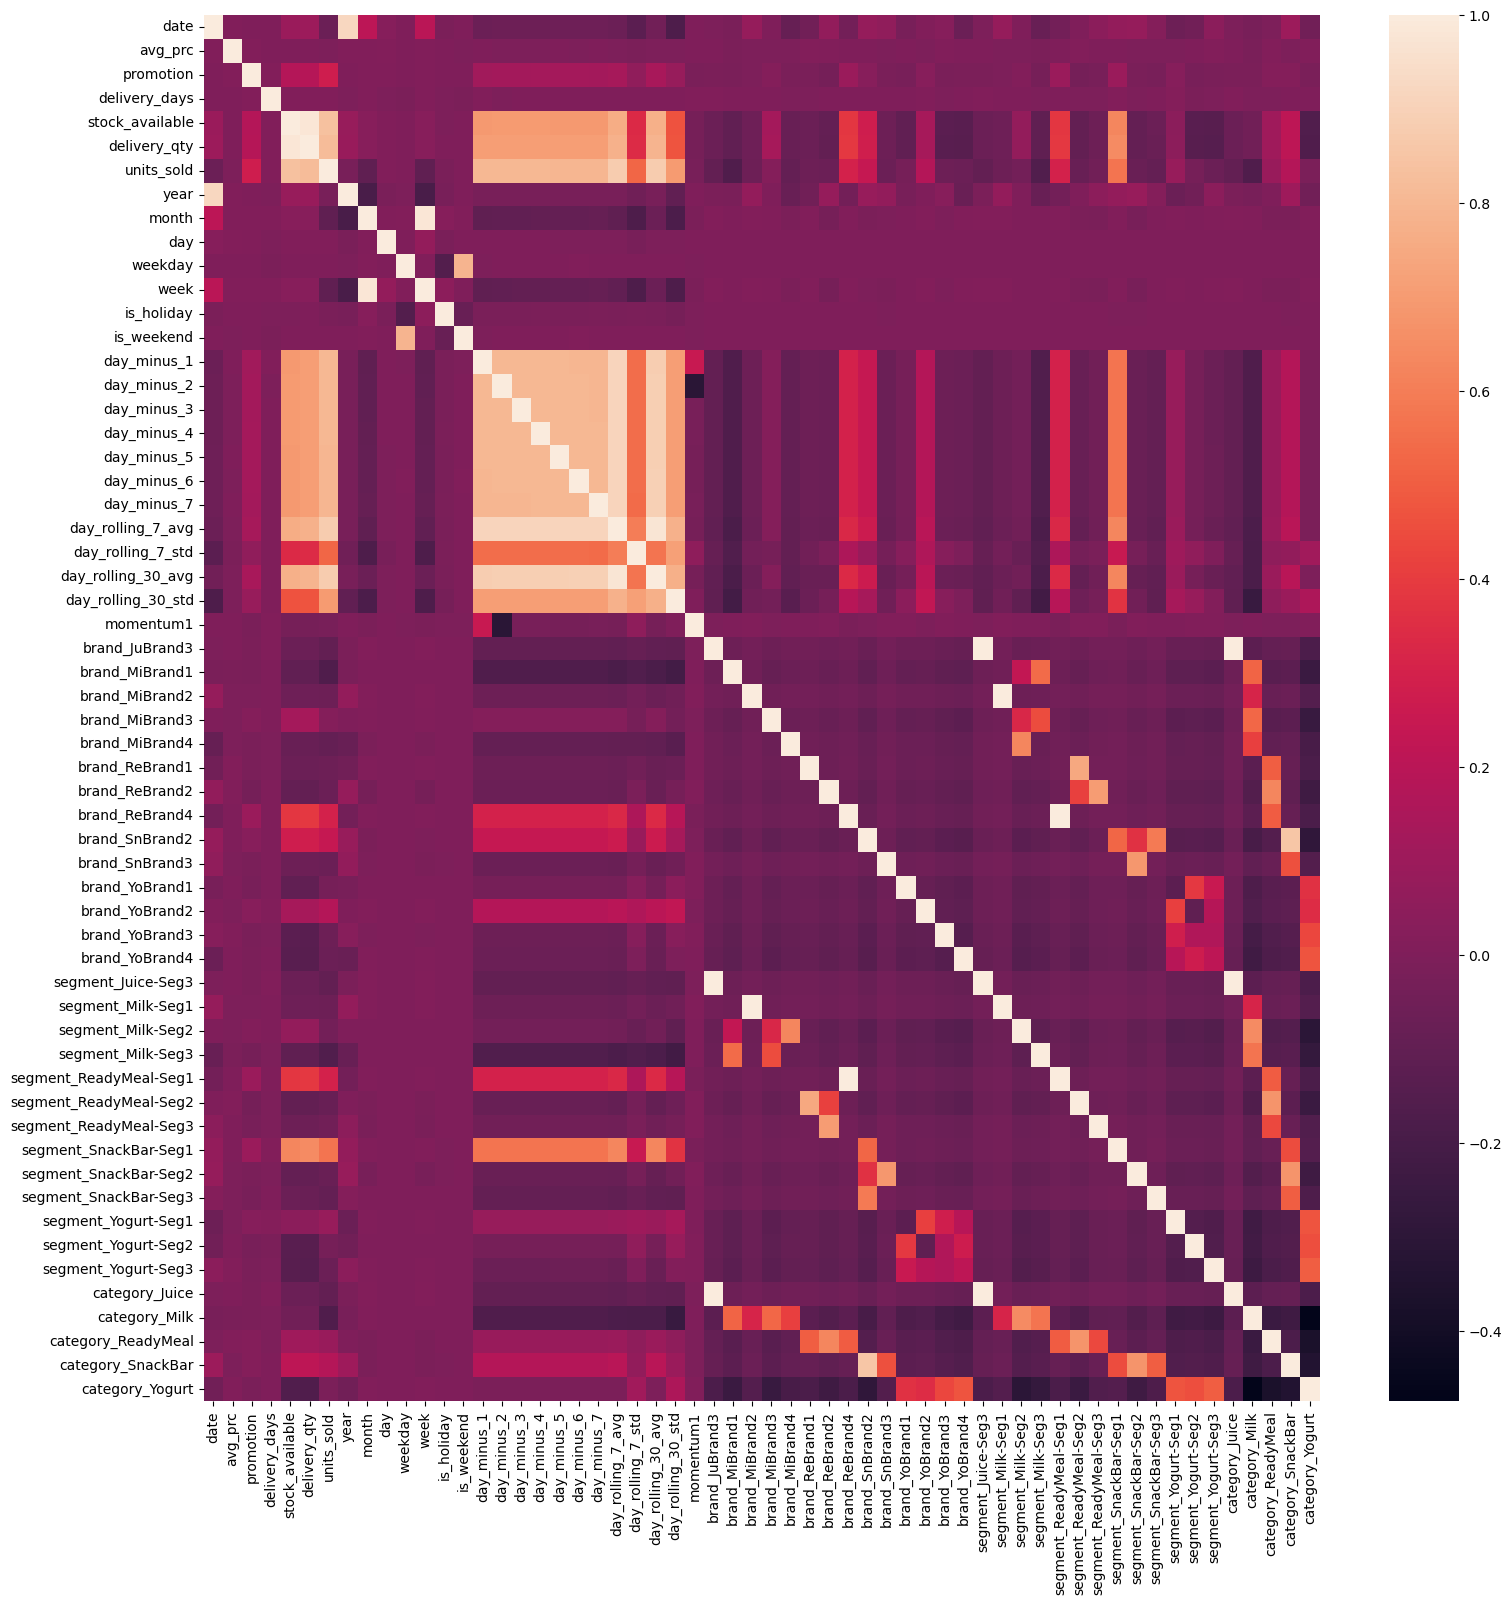

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(d1.corr())

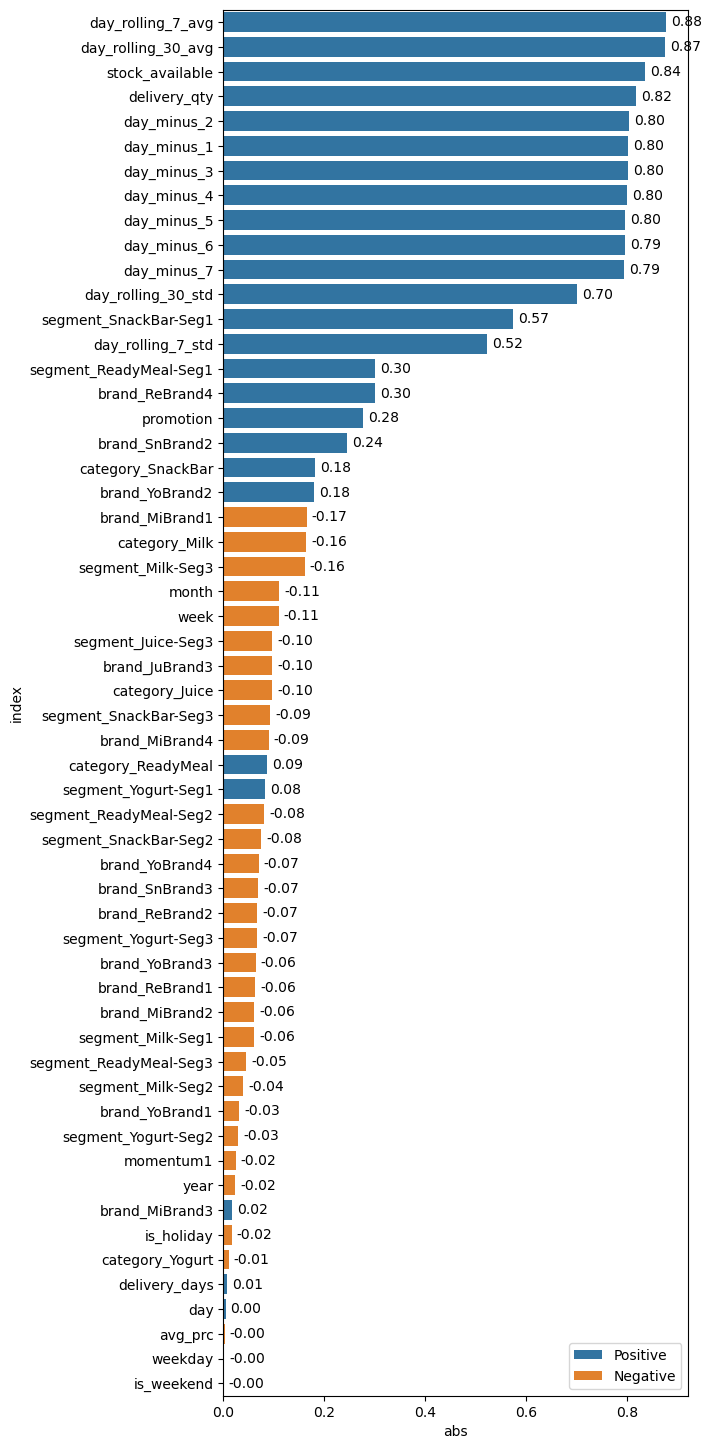

In [ ]:
corr_df = d1.drop('date',axis=1).corr().loc[:,'units_sold'].reset_index()
corr_df['abs'] = corr_df['units_sold'].abs()
corr_df.sort_values('abs', ascending=False,inplace=True,ignore_index=True)
plt.figure(figsize=(6,18))
ax = sns.barplot(
    data=corr_df.iloc[1:],
    x='abs',
    y='index',
    hue=['Positive' if val > 0 else 'Negative' for val in corr_df['units_sold'].iloc[1:]],
    )

for i, (abs_val, units_val) in enumerate(zip(corr_df['abs'].iloc[1:], corr_df['units_sold'].iloc[1:])):
    ax.text(abs_val + 0.01, i, f"{units_val:.2f}", va='center')

plt.show()

plt.show()

# BUILD MODEL

In [ ]:
min_date = d['date'].min()
max_date = d['date'].max()
split_date = min_date + (max_date - min_date) * 0.8
x_train = d.loc[d['date'] <= split_date,~d.columns.isin(['date','units_sold'])].copy()
x_test = d.loc[d['date'] > split_date,~d.columns.isin(['date','units_sold'])].copy()
y_train = d.loc[d['date'] <= split_date,'units_sold'].copy()
y_test = d.loc[d['date'] > split_date,'units_sold'].copy()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15561, 27) (15561,)
(5225, 27) (5225,)


In [ ]:
x_train.head()

,brand,segment,category,avg_prc,promotion,delivery_days,stock_available,delivery_qty,year,month,...,day_minus_3,day_minus_4,day_minus_5,day_minus_6,day_minus_7,day_rolling_7_avg,day_rolling_7_std,day_rolling_30_avg,day_rolling_30_std,momentum1
30,JuBrand3,Juice-Seg3,Juice,4.888611,1,3.555556,1657,1700,2022,8,...,134.0,132.0,137.0,171.0,122.0,144.714286,22.816034,157.766667,43.998968,1.365672
31,JuBrand3,Juice-Seg3,Juice,5.115648,1,3.000000,857,1001,2022,8,...,134.0,134.0,132.0,137.0,171.0,163.285714,44.165274,158.733333,45.764716,1.377049
32,JuBrand3,Juice-Seg3,Juice,5.402128,1,3.285714,1075,1383,2022,8,...,183.0,134.0,134.0,132.0,137.0,154.285714,48.534229,157.266667,46.683774,0.428571
33,JuBrand3,Juice-Seg3,Juice,4.961200,1,2.571429,1031,1172,2022,8,...,252.0,183.0,134.0,134.0,132.0,148.142857,53.548821,155.633333,48.037689,0.870370
34,JuBrand3,Juice-Seg3,Juice,7.488286,1,3.000000,1120,1477,2022,8,...,108.0,252.0,183.0,134.0,134.0,147.142857,53.964274,154.266667,48.315010,1.329787


In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
# Fit the model and get results
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

# Print the results
pd.DataFrame(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4187
[LightGBM] [Info] Number of data points in the train set: 15561, number of used features: 31
[LightGBM] [Info] Start training from score 181.671358


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.94,0.94,23.17,12.30
LGBMRegressor,0.93,0.93,23.85,0.30
GradientBoostingRegressor,0.93,0.93,23.98,6.38
ExtraTreesRegressor,0.93,0.93,24.19,10.30
HistGradientBoostingRegressor,0.93,0.93,24.28,0.72
RandomForestRegressor,0.93,0.93,24.88,25.33
XGBRegressor,0.93,0.93,25.05,0.34
BaggingRegressor,0.92,0.92,26.11,2.36
LassoCV,0.91,0.91,28.25,0.58


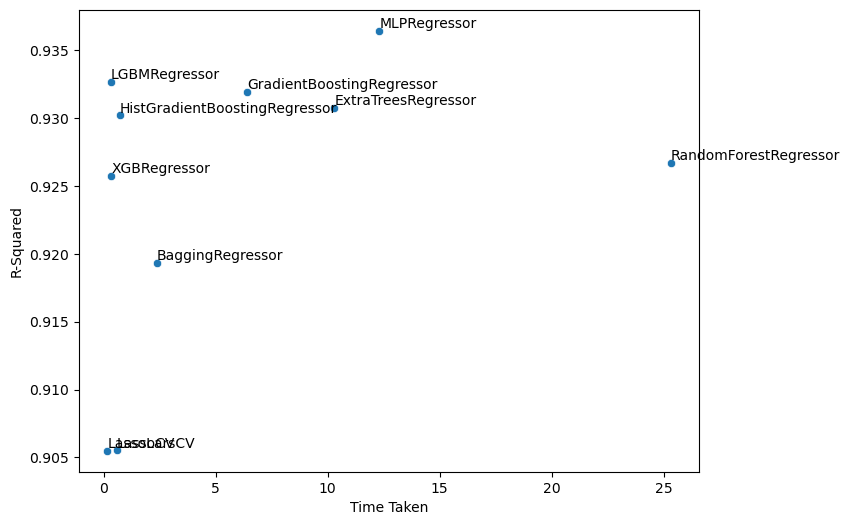

In [ ]:
d2 = pd.DataFrame(models).head(10).reset_index()

plt.figure(figsize=(8,6))
ax = plt.gca()

sns.scatterplot(
    data=d2,
    y='R-Squared',
    x='Time Taken'
)

# Thêm label từ index
for i in range(len(d2)):
    plt.text(
        d2.loc[i, 'Time Taken'],
        d2.loc[i, 'R-Squared'],
        d2.loc[i, 'Model'],
        fontsize=10,
        ha='left',
        va='bottom'
    )

plt.show()


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15561 entries, 30 to 21326
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               15561 non-null  object 
 1   segment             15561 non-null  object 
 2   category            15561 non-null  object 
 3   avg_prc             15561 non-null  float64
 4   promotion           15561 non-null  int64  
 5   delivery_days       15561 non-null  float64
 6   stock_available     15561 non-null  int64  
 7   delivery_qty        15561 non-null  int64  
 8   year                15561 non-null  int32  
 9   month               15561 non-null  int32  
 10  day                 15561 non-null  int32  
 11  weekday             15561 non-null  int32  
 12  week                15561 non-null  UInt32 
 13  is_holiday          15561 non-null  int32  
 14  is_weekend          15561 non-null  int32  
 15  day_minus_1         15561 non-null  float64
 16  day_minu

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest

num_columns = x_train.select_dtypes(exclude='object').columns.tolist()
cat_columns = ['brand','segment','category']

transformer = ColumnTransformer(transformers=[
    ('num_transform', StandardScaler(), num_columns),
    ('cat_transform', OneHotEncoder(handle_unknown='ignore'), cat_columns)
])

models = Pipeline(steps = [
    ('transformer', transformer),
    ('model', LGBMRegressor(random_state=42))
])

models.fit(x_train, y_train)
y_pred = models.predict(x_test)
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4214
[LightGBM] [Info] Number of data points in the train set: 15561, number of used features: 56
[LightGBM] [Info] Start training from score 181.671358
R2: 0.9321972109801994
MSE: 572.773700210954
MAE: 17.1540029854787


In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

tscv = TimeSeriesSplit(
    n_splits=5,
    test_size=None
)

param_grid = {
    "model__num_leaves": [31, 63],
    "model__max_depth": [5, -1],
    "model__learning_rate": [0.05, 0.1],
    "model__n_estimators": [300],
    "model__subsample": [0.8],
    "model__colsample_bytree": [0.8],
    "model__min_child_samples": [20, 40],
}


grid = GridSearchCV(
    estimator=models,
    param_grid=param_grid,
    scoring='r2',
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4214
[LightGBM] [Info] Number of data points in the train set: 15561, number of used features: 56
[LightGBM] [Info] Start training from score 181.671358
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3330
[LightGBM] [Info] Number of data points in the train set: 15561, number of used features: 20
[LightGBM] [Info] Start training from score 181.671358
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

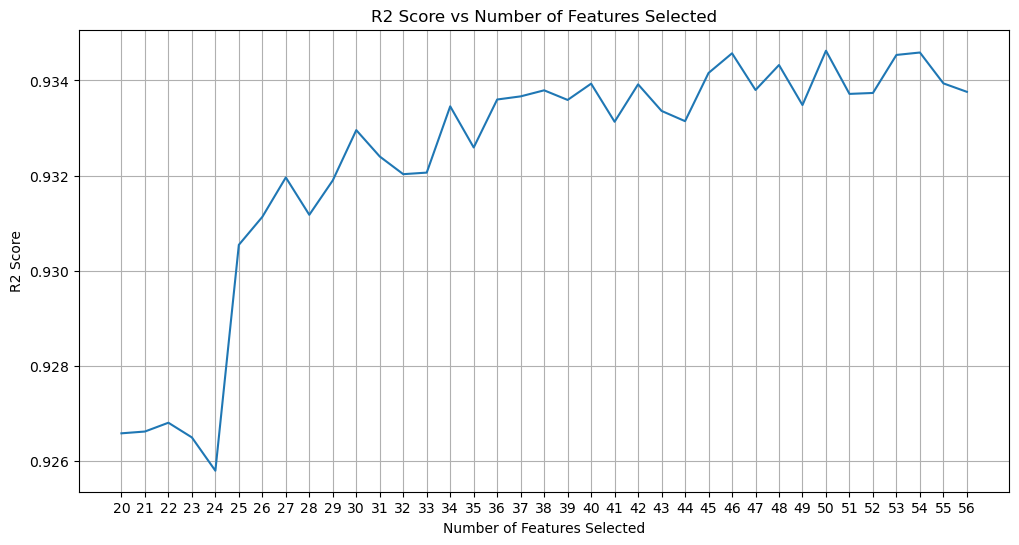

In [ ]:
r2_list = []

for i in range(20,57):
    model = LGBMRegressor(
        random_state=42,
        colsample_bytree=0.8,
        learning_rate=0.05,
        max_depth=5,
        min_child_samples=20,
        n_estimators=300,
        num_leaves=63,
        subsample=0.8)

    regressor = Pipeline(steps = [
        ('transformer', transformer),
        ('feature_selection', SelectKBest(k=i)),
        ('model', model )
    ])
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_list.append((i, r2))

plt.figure(figsize=(12,6))
plt.plot([item[0] for item in r2_list],[item[1] for item in r2_list])
plt.grid()
plt.xlabel('Number of Features Selected')
plt.ylabel('R2 Score')
plt.xticks(range(20,57))
plt.title('R2 Score vs Number of Features Selected')
plt.show()

In [ ]:
model = LGBMRegressor(
    random_state=42,
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    min_child_samples=20,
    n_estimators=300,
    num_leaves=63,
    subsample=0.8)

regressor = Pipeline(steps = [
    ('transformer', transformer),
    ('feature_selection', SelectKBest(k=46)),
    ('model', model )
])
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3941
[LightGBM] [Info] Number of data points in the train set: 15561, number of used features: 46
[LightGBM] [Info] Start training from score 181.671358
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

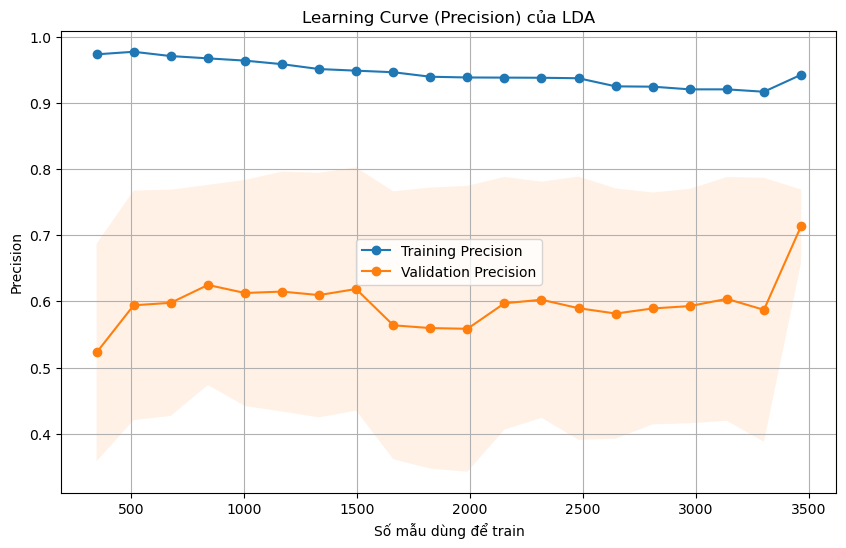

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

x = d.loc[:,~d.columns.isin(['date','units_sold'])].copy()
y = d['units_sold'].copy()

tscv = TimeSeriesSplit(
    n_splits=5,
    test_size=None
)


train_sizes_abs, train_scores, val_scores = learning_curve(
    estimator=regressor,
    X=x,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 20),
    cv=tscv,
    scoring='r2',
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes_abs, train_mean, marker='o', label='Training Precision')
plt.plot(train_sizes_abs, val_mean, marker='o', label='Validation Precision')

plt.fill_between(train_sizes_abs, train_mean-train_std, train_mean+train_std, alpha=0.1)
plt.fill_between(train_sizes_abs, val_mean-val_std, val_mean+val_std, alpha=0.1)

plt.title("Learning Curve (Precision) của LDA")
plt.xlabel("Số mẫu dùng để train")
plt.ylabel("Precision")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Lấy transformer
ct = regressor.named_steps['transformer']

# Lấy danh sách cột số
num_features = ct.named_transformers_['num_transform'].get_feature_names_out(num_columns)

# Lấy danh sách cột one-hot
cat_features = ct.named_transformers_['cat_transform'].get_feature_names_out(cat_columns)

# Gộp tất cả
all_features = list(num_features) + list(cat_features)

selector = regressor.named_steps['feature_selection']

scores = selector.scores_
pvalues = selector.pvalues_

fi_kbest = pd.DataFrame({
    'feature': all_features,
    'score': scores,
    'pvalue': pvalues,
    'selected': selector.get_support()
}).sort_values('score', ascending=False)


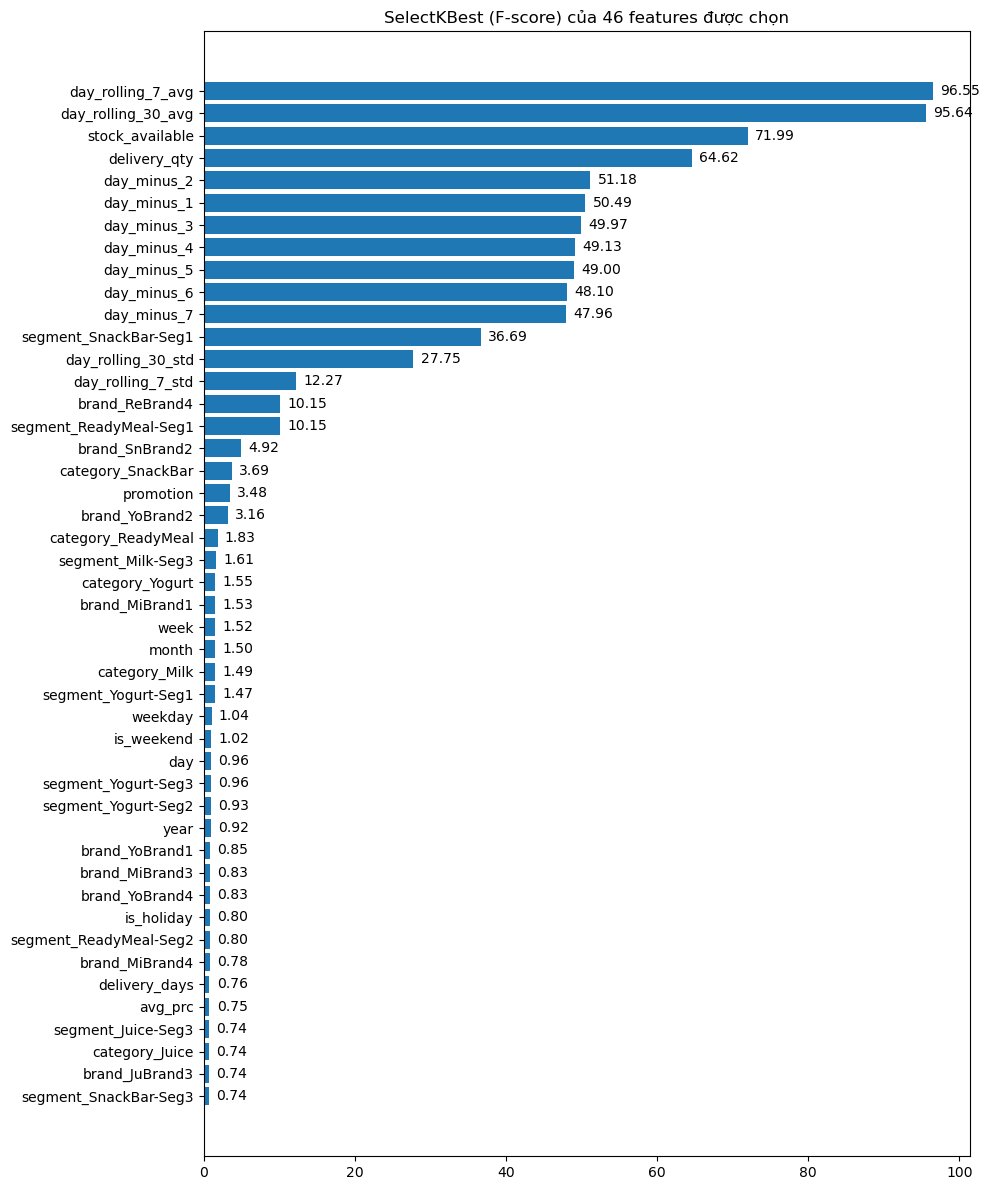

In [ ]:
fi_kbest_top = fi_kbest[fi_kbest['selected']]

plt.figure(figsize=(10,12))
bars = plt.barh(fi_kbest_top['feature'], fi_kbest_top['score'])
plt.gca().invert_yaxis()
plt.title("SelectKBest (F-score) của 46 features được chọn")

# add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max(fi_kbest_top['score'])*0.01,
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}",
        va='center'
    )

plt.tight_layout()
plt.show()

In [ ]:
d[['brand','segment','category']].drop_duplicates().reset_index(drop=True)

,brand,segment,category
0,JuBrand3,Juice-Seg3,Juice
1,MiBrand1,Milk-Seg2,Milk
2,MiBrand1,Milk-Seg3,Milk
3,MiBrand2,Milk-Seg1,Milk
4,MiBrand3,Milk-Seg2,Milk
5,MiBrand3,Milk-Seg3,Milk
6,MiBrand4,Milk-Seg2,Milk
7,ReBrand1,ReadyMeal-Seg2,ReadyMeal
8,ReBrand2,ReadyMeal-Seg2,ReadyMeal
9,ReBrand2,ReadyMeal-Seg3,ReadyMeal
